In [1]:
import time
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from utils.experiment import test_function, test_points
from utils.crps import crps_loop_function

# 1. Setting
### 1.1 parameters

In [3]:
seed = 1  # random seed
n = 20    # number of training data points
N = 200   # number of test data points
M = 30   # function sample size
torch.manual_seed(seed)

### 1.2 forecaster to evaluate

In [5]:
gp_test = test_function(n=n)       # The GP trained for Ackley function with n oracles
X_test, Y_test = test_points(N=N)  # The test dataset from true Ackley function
pred = gp_test.posterior(X_test)   # GP posterier predictive distributioin conditioned on test points
f = pred.sample(torch.Size([M]))   # M function samples drawn from the GP posterior

/Users/adachimaki/Desktop/CRPS/utils/experiment.py:12: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  gp_test = botorch.models.SingleTaskGP(
/opt/anaconda3/lib/python3.11/site-packages/botorch/models/utils/assorted.py:174: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/opt/anaconda3/lib/python3.11/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([6.5542]), std = tensor([2.7517])). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
/opt/anaconda3/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added ji

### 1.3 Visualize GP forecaster for sanity check

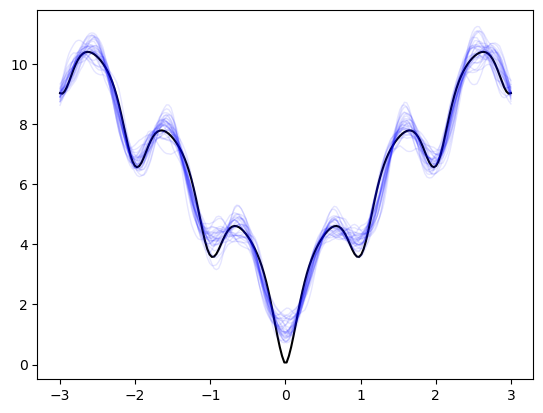

In [7]:
plt.plot(X_test.squeeze(), Y_test.squeeze(), color="k", label="true CDF")
for m in range(M):
    plt.plot(X_test, f[m], color="b", linewidth=1, alpha=0.1)

# 2. Compute CRPS
### 2.1 Compute exact CRPS

Exact CRPS: 0.14335943758487701


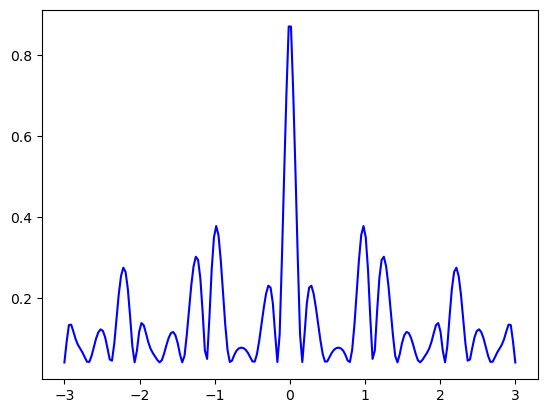

In [9]:
crps_exact = crps_loop_function(pred, Y_test, M=M, quantiles=None, method="exact")
plt.plot(X_test, crps_exact, color="b")

score_exact = crps_exact.mean()  # sample average
print(f"Exact CRPS: {score_exact}")

### 2.2 Quantile-based CRPS

Estimation error: 0.025320139498362537


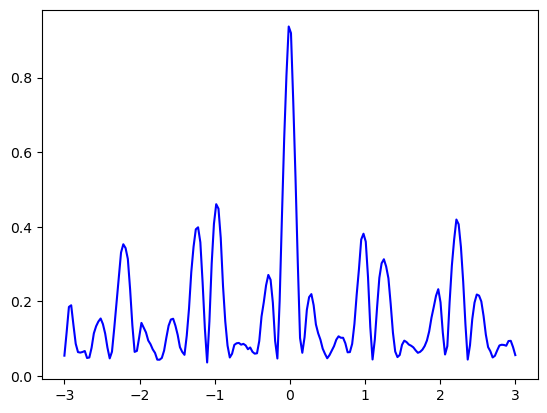

In [11]:
quantiles = torch.linspace(0.1,0.9,9)

crps_quantile = crps_loop_function(pred, Y_test, M=M, quantiles=quantiles, method="quantile")
plt.plot(X_test, crps_quantile, color="b")

score_quantile = crps_quantile.mean()  # sample average
print(f"Estimation error: {score_quantile - score_exact}")

### 2.3 PWM CRPS

Estimation error: 0.2143467217683792


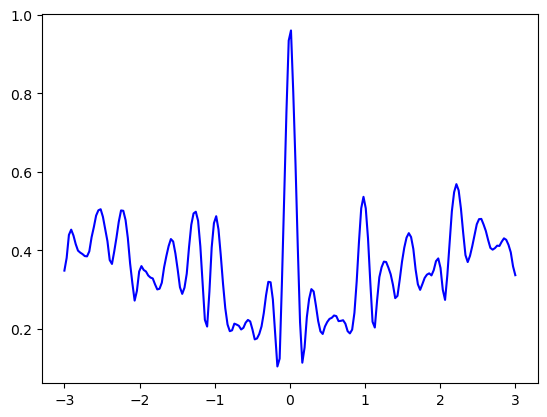

In [13]:
crps_pwm = crps_loop_function(pred, Y_test, M=M, quantiles=None, method="pwm")
plt.plot(X_test, crps_pwm, color="b")

score_pwm = crps_pwm.mean()  # sample average
print(f"Estimation error: {score_pwm - score_exact}")

### 2.4 KernQuad CRPS

Estimation error: 0.0034656524658203125


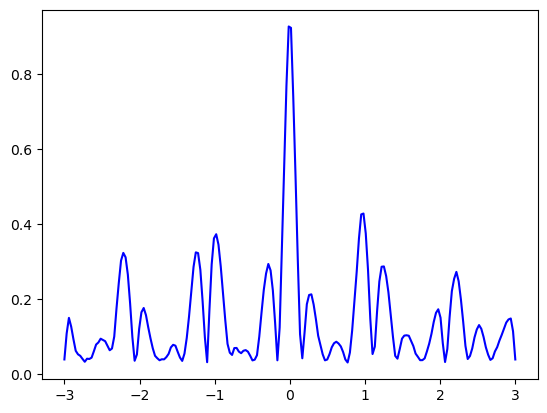

In [15]:
crps_kern_quad = crps_loop_function(pred, Y_test, M=M, quantiles=None, method="kern_quad")
plt.plot(X_test, crps_kern_quad, color="b")

score_kern_quad = crps_kern_quad.mean()  # sample average
print(f"Estimation error: {score_kern_quad - score_exact}")